# 段小手-第 9 章 数据预处理、降维、特征提取、聚类

## 认识常见的几个数据预处理的类

### 生成数据

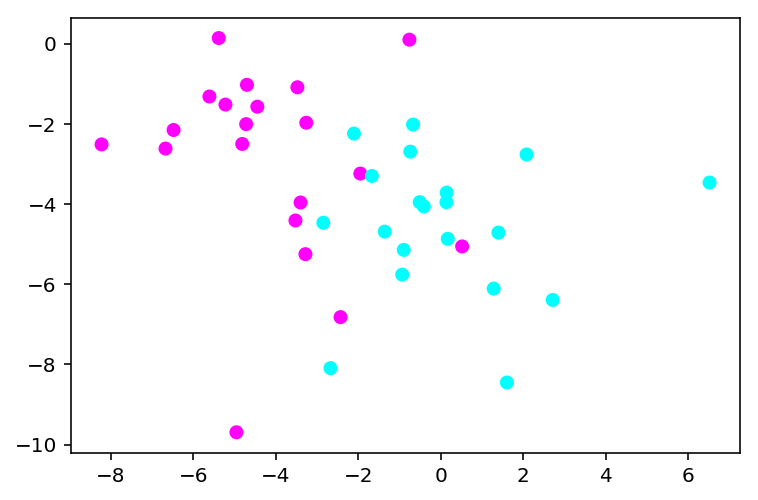

In [6]:
from sklearn.datasets import make_blobs

# cluster_std 标准差
X, y = make_blobs(n_samples=40, centers=2, random_state=50, cluster_std=2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.cool)
plt.show()

### 使用 StandardScaler 将数据的特征值转换为均值为 0 ，而方差为 1 

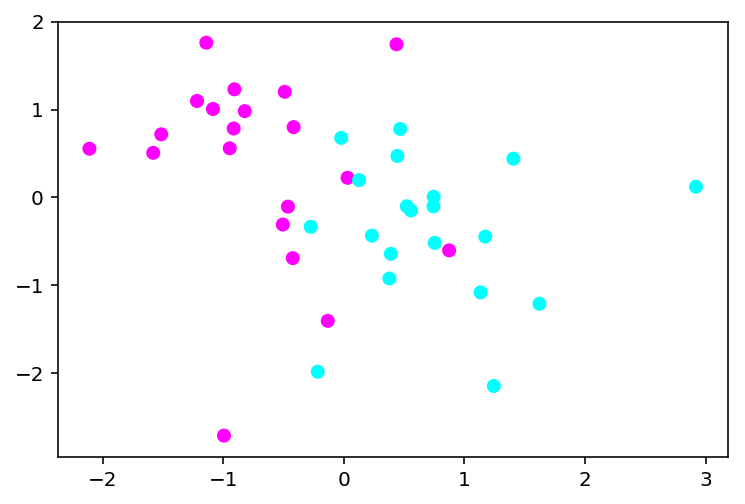

In [11]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_1 = ss.fit_transform(X)
plt.scatter(X_1[:, 0], X_1[:, 1], c=y, cmap=plt.cm.cool)
plt.show()

### 使用 MinMaxScaler 将数据转换为 0 和 1 之间

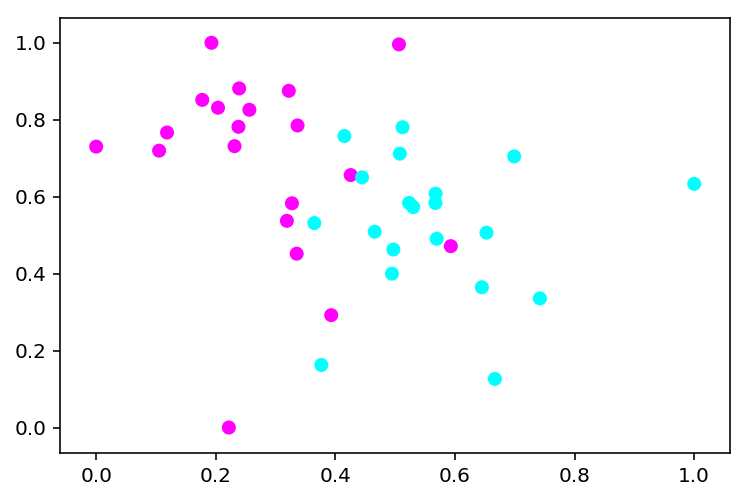

In [12]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
X_2 = mm.fit_transform(X)
plt.scatter(X_2[:, 0], X_2[:, 1], c=y, cmap=plt.cm.cool)
plt.show()

### RobustScaler 使用中位数和四分位数

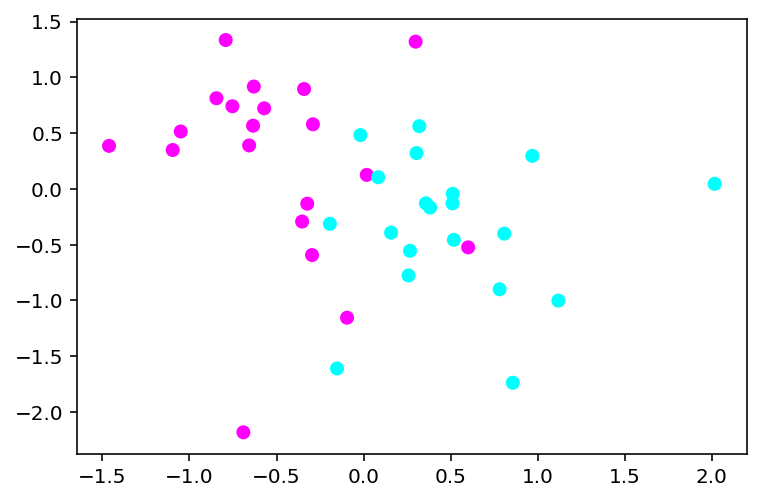

In [15]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()
X_3 = rs.fit_transform(X)
plt.scatter(X_3[:, 0], X_3[:, 1], c=y, cmap=plt.cm.cool)
plt.show()

### Normalizer 将所有的样本的特征向量转换为欧几里得距离为 1

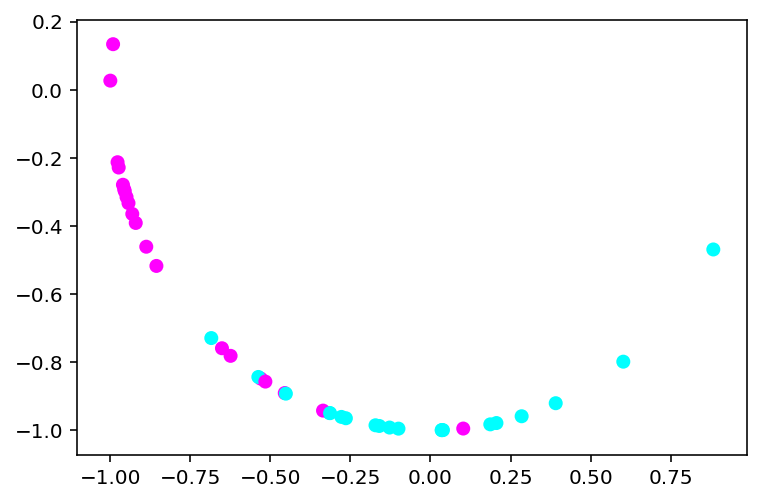

In [16]:
from sklearn.preprocessing import Normalizer

n = Normalizer()
X_4 = n.fit_transform(X)
plt.scatter(X_4[:, 0], X_4[:, 1], c=y, cmap=plt.cm.cool)
plt.show()

+ <span class="burk">把数据的分布变成一个半径为 $1$ 的圆，或者是一个球</span>；
+ `Normalizer` 通常是我们只想保留数据特征向量的方向，而忽略其数值的时候使用

## 通过数据的预处理提高模型的准确度

In [17]:
# 加载数据集
from sklearn.datasets import load_wine

wine = load_wine()

In [20]:
# 分割训练集和测试集
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, random_state=62)

In [26]:
# 使用神经网络
from sklearn.neural_network import MLPClassifier

# 2 个隐藏层，每层有 100 个节点，最大迭代次数 400 次
mlp = MLPClassifier(
    hidden_layer_sizes=[100, 100], max_iter=400, random_state=62)
# 使用 mlp 拟合数据
mlp.fit(X_train, y_train)
print('神经网络模型得分：', mlp.score(X_test, y_test))

神经网络模型得分： 0.24444444444444444


可以说是很差劲了。

### 进行预处理以后，看看神奇的效果

In [29]:
from sklearn.preprocessing import MinMaxScaler

# 先 fit 一下 ，然后训练集和测试集一起 transform
mm = MinMaxScaler()
mm.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [30]:
X_train_scaler = mm.transform(X_train)
X_test_scaler = mm.transform(X_test)

上面的这个流程是固定的：
+ 使用训练数据集 fit；
+ 而后 X_train 和 X_test 一起 `transform`，即训练数据集使用测试数据集的最值归一化，<span class="burk">统一预处理的步骤和数值，这一点很关键，永远不能使用测试数据集 `fit`</span>。

In [31]:
# 重新训练模型，并且看看分数
mlp.fit(X_train_scaler, y_train)
print('神经网络模型得分：', mlp.score(X_test_scaler, y_test))

神经网络模型得分： 1.0


是不是很神奇，我们把特征做了处理以后，神经网络模型的准确率就提升到 $100\%$ 了。

## 数据降维

### 降维的作用之一：可视化

In [32]:
from sklearn.datasets import load_wine

wine = load_wine()
X = wine.data
y = wine.target

In [34]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)
X_scaled.shape

(178, 13)

In [37]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
X_pca.shape

(178, 2)

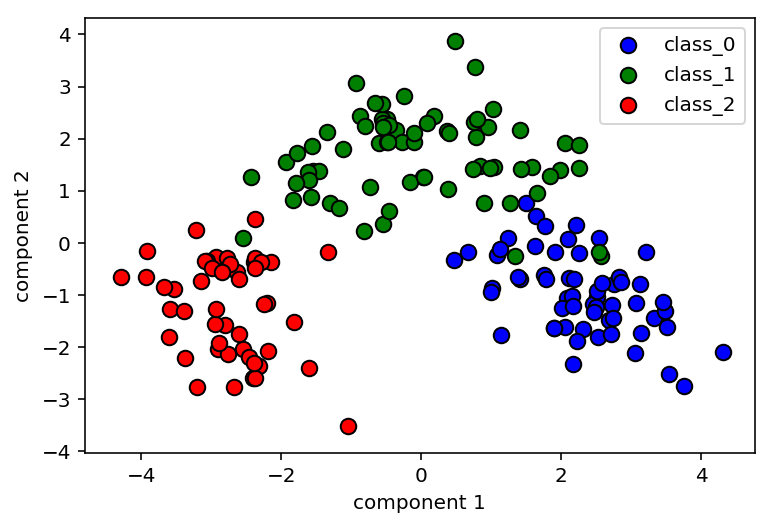

In [44]:
# 下面绘制散点图，看看数据的分布

X0 = X_pca[y == 0]
X1 = X_pca[y == 1]
X2 = X_pca[y == 2]
plt.scatter(X0[:, 0], X0[:, 1], c='b', s=60, edgecolors='k')
plt.scatter(X1[:, 0], X1[:, 1], c='g', s=60, edgecolors='k')
plt.scatter(X2[:, 0], X2[:, 1], c='r', s=60, edgecolors='k')
plt.legend(wine.target_names, loc='best')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

PCA 原理：这两个主成分是原来 $13$ 个主成分的线性组合。

In [46]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283]])

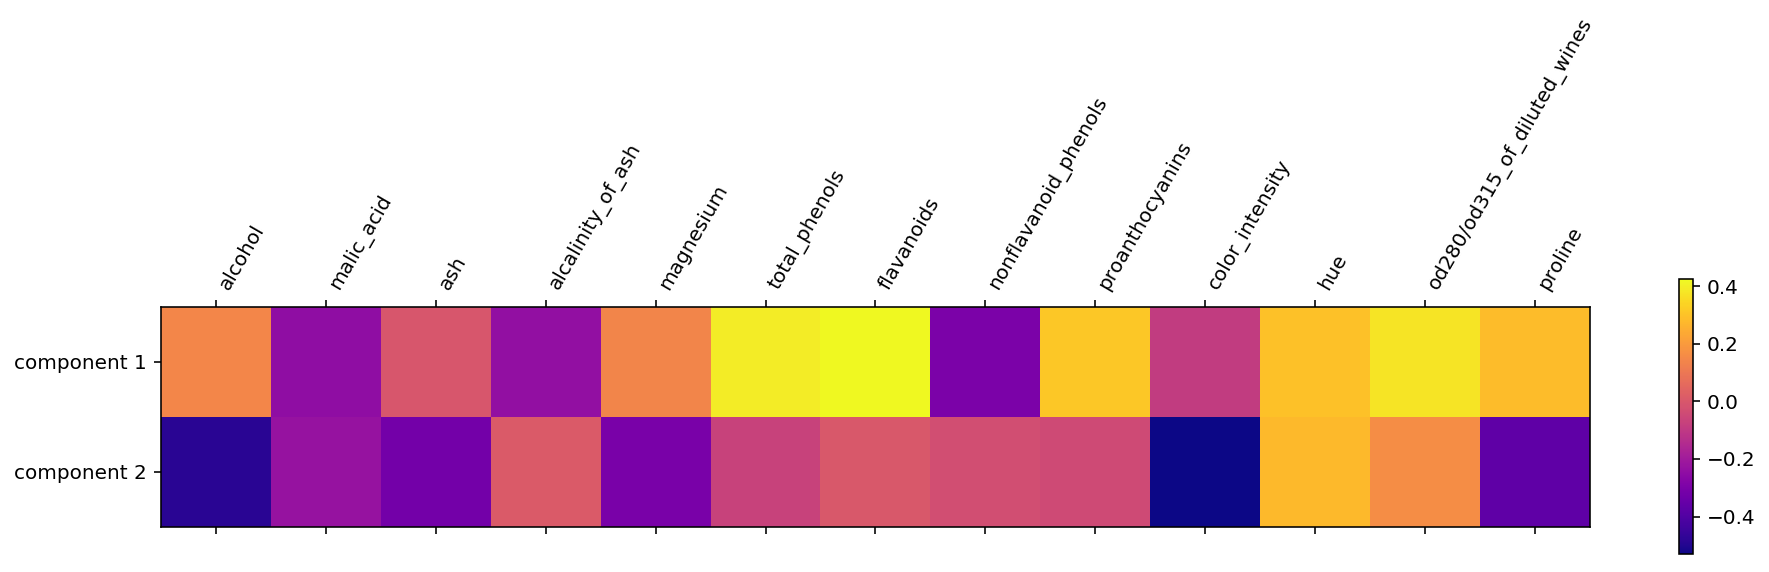

In [49]:
plt.matshow(pca.components_, cmap='plasma')
plt.yticks([0,1],['component 1','component 2'])
plt.colorbar()
plt.xticks(range(len(wine.feature_names)),wine.feature_names,rotation=60,ha='left')
plt.show()

## PCA 白化 whiten = True  

## 非负矩阵分解用于特征提取